*************** EP Error ***************
EP Error /onnxruntime_src/onnxruntime/python/onnxruntime_pybind_state.cc:507 void onnxruntime::python::RegisterTensorRTPluginsAsCustomOps(PySessionOptions&, const onnxruntime::ProviderOptions&) Please install TensorRT libraries as mentioned in the GPU requirements page, make sure they're in the PATH or LD_LIBRARY_PATH, and that your GPU is supported.
 when using ['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']
Falling back to ['CUDAExecutionProvider', 'CPUExecutionProvider'] and retrying.
****************************************


2025-01-07 11:59:35.047887344 [E:onnxruntime:Default, provider_bridge_ort.cc:1848 TryGetProviderInfo_TensorRT] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1539 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_tensorrt.so with error: libonnxruntime_providers_tensorrt.so: cannot open shared object file: No such file or directory



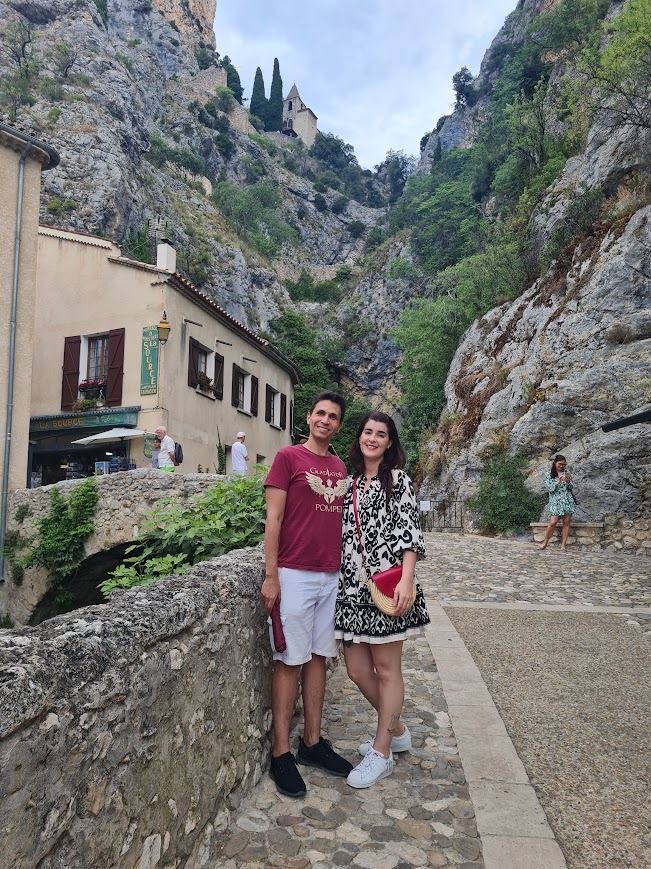

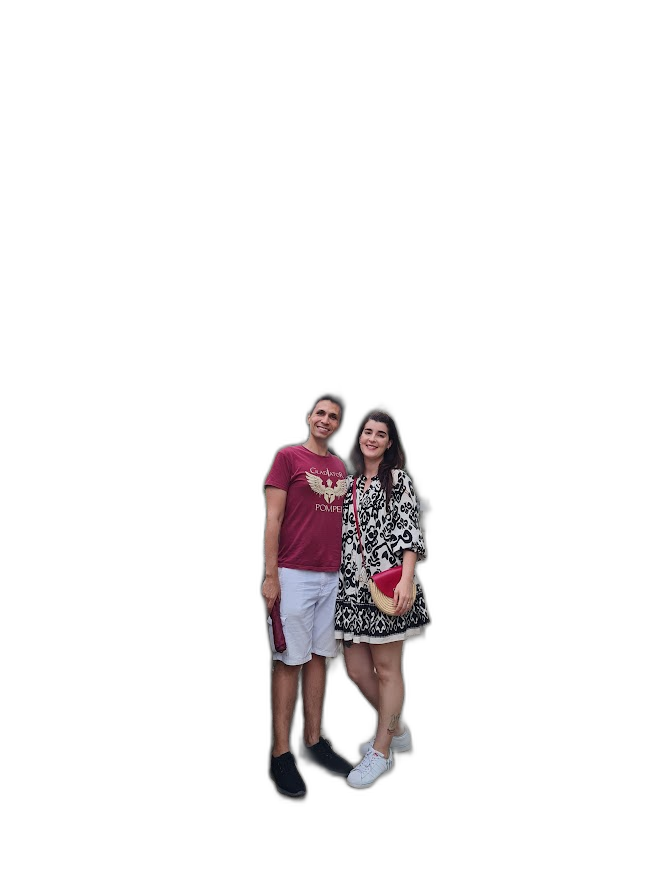

In [3]:
import rembg
from PIL import Image

def remove_background(input_path, output_path):
    with open(input_path, "rb") as input_file, open(output_path, "wb") as output_file:
        input_data = input_file.read()
        output_data = rembg.remove(input_data)
        output_file.write(output_data)

# Specify input and output paths
input_image_path = "media/images/20240706_174232.jpg"
output_image_path = "output_image.png"

# Remove background
remove_background(input_image_path, output_image_path)

# Display the results
original_image = Image.open(input_image_path)
removed_background_image = Image.open(output_image_path)

original_image.show(title="Original Image")
removed_background_image.show(title="Image with Removed Background")

In [11]:
import requests
from requests.auth import HTTPBasicAuth
from requests.exceptions import HTTPError

METEO_URI_TOKEN = "https://login.meteomatics.com/api/v1/token"
METEO_USER = "caldeirasstudio_caldeira_jhonatan"
METEO_PASSWORD = "fTZ0hU5b87"

response = requests.get(METEO_URI_TOKEN, auth=HTTPBasicAuth(METEO_USER, METEO_PASSWORD))

if response.status_code == 200:
    access_token = response.json()['access_token']
else:
    raise HTTPError(
            status_code=403, 
            detail="Could not validate API KEY"
        )

datetime = '2025-01-16T12:00:00Z'
parameters = 't_2m:C'
lat = '43.5298424'
long = '5.4474738'
locations = f'{lat},{long}'
format = 'json'

METEO_URI_API = f'https://api.meteomatics.com/{datetime}/{parameters}/{locations}/{format}'
header = {'Authorization':f'Bearer {access_token}'}
response = requests.get(METEO_URI_API, headers=header)

print(response.json())
    


{'version': '3.0', 'user': 'caldeirasstudio_caldeira_jhonatan', 'dateGenerated': '2025-01-15T19:05:48Z', 'status': 'OK', 'data': [{'parameter': 't_2m:C', 'coordinates': [{'lat': 43.529842, 'lon': 5.447474, 'dates': [{'date': '2025-01-16T12:00:00Z', 'value': 10.8}]}]}]}


# API GET GEO AND TEMPERATURE

In [74]:
from broker import tasks

response = tasks.get_lat_long('Aix-en-provence')
print(response)

datetime = '2025-01-20T12:00:00Z'
lat = response['lat']
long = response['long']

response = tasks.get_meteo(datetime,lat,long)

if response.status_code == 200:
    print(response.json())
    temperature = response.json()['data'][0]['coordinates'][0]['dates'][0]['value']
else:
    temperature = None

[{'place_id': 70750679, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 70279, 'boundingbox': ['43.4461058', '43.6259224', '5.2694745', '5.5063013'], 'lat': '43.5298424', 'lon': '5.4474738', 'display_name': "Aix-en-Provence, Bouches-du-Rhône, Provence-Alpes-Côte d'Azur, Metropolitan France, France", 'class': 'boundary', 'type': 'administrative', 'importance': 0.891084766383758}, {'place_id': 70731615, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 4290854846, 'boundingbox': ['43.5177288', '43.5277288', '5.4401153', '5.4501153'], 'lat': '43.5227288', 'lon': '5.4451153', 'display_name': "Aix-en-Provence, Rue Gustave Desplaces, Cuques, Aix-en-Provence, Bouches-du-Rhône, Provence-Alpes-Côte d'Azur, Metropolitan France, 13627, France", 'class': 'railway', 'type': 'station', 'importance': 0.675422043353773}, {'place_id': 70724787, 'licence': 'Data © OpenS

In [75]:
import os
import requests
#DB
SERVER = os.getenv("PG_API_SERVER")
PORT = os.getenv("PG_API_PORT")
ENDPOINT = os.getenv("PG_API_ENDPONT")

topwear_only = True
temperature = temperature if temperature != None else 11

PG_URI = f"http://{SERVER}:{PORT}/{ENDPOINT}"
PG_API_KEY = os.getenv("PG_API_KEY")

header = {"access_token": PG_API_KEY}
response = requests.get(f"{PG_URI}/images_from_client?client_id={17}",
                            headers=header)

import pandas as pd
import json

ds = pd.read_json(json.dumps(response.json()))

season = []
if temperature < 10:
    season = ['Winter']
elif temperature >= 10 and temperature < 20:
    season = ['Fall', 'Spring']
else:
    season = ['Summer']
    
topwear_ds = ds[ds['sub_category']=='Topwear']
bottomwear = ds[ds['sub_category']=='Bottomwear']

topwear_ds = topwear_ds[topwear_ds['season'].isin(season)]
bottomwear = bottomwear[bottomwear['season'].isin(season)]

random_top = topwear_ds.sample(n=1)

bottomwear

/tmp/ipykernel_42472/612815257.py:21: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ds = pd.read_json(json.dumps(response.json()))


,id,path,gender,color,color_rgb,season,article,category,sub_category,usage_type
1,1340,/home/jcaldeira/media/17/image_1736247974_5nxc...,Unisex,Grey Melange,"(169, 169, 169)",Fall,Jeans,Apparel,Bottomwear,Casual
3,1338,/home/jcaldeira/media/17/image_1736247859_4sef...,Unisex,Multi,"(255, 0, 255)",Fall,Trousers,Apparel,Bottomwear,Casual


In [87]:
random_top

,id,path,gender,color,color_rgb,season,article,category,sub_category,usage_type
0,1341,/home/jcaldeira/media/17/image_1736248048_v8rp...,Unisex,Coffee Brown,"(111, 78, 55)",Fall,Jackets,Apparel,Topwear,Casual


In [1]:
import pandas as pd
from colorsys import rgb_to_hsv

# Lista de cores neutras (em RGB)
NEUTRAL_COLORS = [
    (0, 0, 0),       # Preto
    (255, 255, 255), # Branco
    (128, 128, 128), # Cinza
    (192, 192, 192), # Bege claro
    (245, 245, 220), # Bege
]

def find_matching_colors_df(df, base_color, mode='complementary'):
    """
    Encontra cores que combinam com a cor base em um DataFrame, incluindo cores neutras.
    
    Args:
        df (pd.DataFrame): DataFrame contendo uma coluna 'color_rgb' com cores no formato RGB (R, G, B).
        base_color (tuple or str): Cor base no formato RGB (R, G, B) ou string (e.g., "Grey Melange").
        mode (str): Modo de combinação ('complementary', 'analogous', 'triadic').
    
    Returns:
        pd.DataFrame: DataFrame filtrado com cores que combinam.
    """
    # Converter a cor base para HSV
    base_h, base_s, base_v = rgb_to_hsv(*[x / 255.0 for x in eval(base_color)])
    
    # Definir harmonia
    match_hues = []
    if mode == 'complementary':
        match_hues = [(base_h + 0.5) % 1]  # Cor oposta
    elif mode == 'analogous':
        match_hues = [(base_h - 0.1) % 1, (base_h + 0.1) % 1]  # Vizinhas
    elif mode == 'triadic':
        match_hues = [(base_h + 1/3) % 1, (base_h + 2/3) % 1]  # Triádicas
    else:
        raise ValueError("Modo inválido. Escolha 'complementary', 'analogous' ou 'triadic'.")
    
    # Função auxiliar para verificar se uma cor combina
    def color_matches(row):
        r, g, b = eval(row['color_rgb'])  # Converter string para tuple (R, G, B)
        # Verificar se a cor é neutra
        if (r, g, b) in NEUTRAL_COLORS:
            return True
        # Calcular HSV e verificar harmonia
        h, s, v = rgb_to_hsv(r / 255.0, g / 255.0, b / 255.0)
        return any(abs(h - target_h) < 0.05 for target_h in match_hues)
    
    # Aplicar filtro ao DataFrame
    filtered_df = df[df.apply(color_matches, axis=1)]
    
    return filtered_df


In [ ]:
find_matching_colors_df(bottomwear, random_top['color_rgb'][0], )

,id,path,gender,color,color_rgb,season,article,category,sub_category,usage_type


In [4]:
import os
import requests
from requests.exceptions import HTTPError

#DB
SERVER = os.getenv("PG_API_SERVER")
PORT = os.getenv("PG_API_PORT")
ENDPOINT = os.getenv("PG_API_ENDPONT")

PG_URI = f"http://{SERVER}:{PORT}/{ENDPOINT}"
PG_API_KEY = os.getenv("PG_API_KEY")

header = {"access_token": PG_API_KEY}
response = requests.get(f"{PG_URI}/images_from_client?client_id={17}",
                            headers=header)

import pandas as pd
import json

def get_cloth_suggestion(id_client, season = None, temperature = None, 
                         usage_type = None, id_top = None, id_bottom = None,
                         n_suggestions = 3):
    
    if season:
        if isinstance(season, str):
            season = [season]
    elif temperature:
        if temperature < 10:
            season = ['Winter']
        elif temperature >= 10 and temperature < 20:
            season = ['Fall', 'Spring']
        else:
            season = ['Summer']
    else:
        raise HTTPError(
            status_code=403, 
            detail="Season or temperature must be provided"
        )

    header = {"access_token": PG_API_KEY}
    response = requests.get(f"{PG_URI}/images_from_client?client_id={id_client}",
                                headers=header)
    
    if response.status_code != 200:
        raise HTTPError(
            status_code=403, 
            detail="Could not get images from client"
        )
    
    ds = pd.read_json(json.dumps(response.json()))
    ds = ds[ds['season'].isin(season)]

    if usage_type:
        ds = ds[ds['usage_type'] == usage_type]

    id_image = None
    random_match = False
    # Check if user selected a topwear or bottomwear cloth as default
    if id_top:
        id_image = id_top
        subcaterogy_to_search = 'Bottomwear'
    elif id_bottom:
        id_image = id_bottom
        subcaterogy_to_search = 'Topwear'
    else:
        random_match = True

    matchs = {'id_client':id_client, 'matchs':[]}
    for i in range(n_suggestions):
        if random_match:
            # If random we will get a random Topwear by N of suggestions
            topwear_random = ds[ds['sub_category']=='Topwear'].sample(n=1)
            id_image = topwear_random['id'].values[0]
            subcaterogy_to_search = 'Bottomwear'

        ds_main_image = ds[ds['id'] == id_image]
        ds_to_search = ds[ds['sub_category'] == subcaterogy_to_search]

        ds_matching = find_matching_colors_df(ds_to_search, 
                                            ds_main_image['color_rgb'].values[0])
        
        if len(ds_matching) != 0:
            new_matching = {}
            if subcaterogy_to_search == 'Topwear':
                new_matching = {'id_top':id_image, 'id_bottom': ds_matching['id'].values[0]}
            else:
                new_matching = {'id_bottom':id_image, 'id_top': ds_matching['id'].values[0]}

            matchs['matchs'].append(new_matching)

    if len(matchs) == 0:
        raise HTTPError(
            status_code=403, 
            detail="No matching found"
        )

    return matchs

In [5]:
response = get_cloth_suggestion(id_client=17, temperature=11)
print(response)

{'id_client': 17, 'matchs': [{'id_bottom': 1341, 'id_top': 1340}, {'id_bottom': 1341, 'id_top': 1340}, {'id_bottom': 1337, 'id_top': 1340}]}


/tmp/ipykernel_1844/2946239428.py:50: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  ds = pd.read_json(json.dumps(response.json()))
